<h1 align="center"> Quick Dive into Scientific Computing with Python and Jupyter </h1>
<h2 align="center"> Part 1: Basics of Scientific Computing </h2> 

First of all, we asume that you know at least a little bit of Python (sorry if not!)

**Basic Python Facts**
* Python is an interpreted programming language --> no need compilation
* Python uses indentation blocks --> no brackets, good readability
* Python is multi-paradigm --> imperative, object-oriented or functional programming

**Basic Jupyter Facts**
* IPython is an interactive Python console --> autocompletion, history, etc.
* IPython Notebooks is the evolution of IPython --> embedded figures, markdown, latex code, etc.
* Is the evolution of IPython Notebooks --> Web-based server

## 1.- Required Packages

* Install Anaconda Python Distribution
    * You can download it from https://www.continuum.io (we recommend Python 3.5)
* [Optional] Create an environment
    * If you already have Anaconda, and you do not want to mess it up, you can create an environment
    * ``> conda create --name sochias jupyter python=3.5``
    * ``> source activate sochias``
    * If you want to remove it later, run ``> conda remove --name flowers --all``
* Update Conda
    * ``> conda update --all``
* Install Jupyter
    * ``> conda install jupyter``
* [Alternative] Using pip
    * ``> pip install notebook``
* Install packages
    * ``> conda install numpy scipy matplotlib``
    * ``> pip install [package]``
* Start using Jupyter
    * ``> jupyter notebook``
    * [Alternative] ``> ipython notebook``

## 2.- Jupyter markdown and code cells

This is a markdown cell:
* Bullets
* Latex formulas: $\int_a^b x dx$
* [Links](http://www.google.cl)
* Code: ``python setup.py``
* Tables

| **X** | **Y** |
|-------|-------|
| 3.145 | 2.34  |
| 0.32  | 3     |

In [1]:
# This is a code cell (python code)
import math
a = [1,2,3,4,5]
b = []
for i in a:
    b.append(i*i)
print(a)
# The last line is returned as output of the cell
b

[1, 2, 3, 4, 5]


[1, 4, 9, 16, 25]

## 3.- Composite Python types

#### Lists
A collection of elements in an array __of any type__!

In [2]:
lst = [42,42.0,"42"]
lst

[42, 42.0, '42']

#### Tuples
like lists, but inmutables (i.e., cannot be changed). Any operation over tuples __creates a new tuple__

In [3]:
tup = (42,42.0,'42')
tup

(42, 42.0, '42')

In [4]:
lst[0]=32
lst

[32, 42.0, '42']

In [5]:
tup[0]=32
tup

TypeError: 'tuple' object does not support item assignment

#### Dictionaries
Also known as keymaps, hashmaps, associative arrays or similar. Is a list, where every element has a __key__ associated with it

In [6]:
dt ={'uno':1,'dos':2,'dos y medio':2.5,'tres':3}
print(dt['uno'])
print(dt['dos y medio'])

1
2.5


## 4.- Imports
Imports do not import the code of a library, but the namespace of it and a few initialization.

In [7]:
# Original Namespace Import
import numpy
a = numpy.array([1,2,3,4])

# Renaming Namespace Import
import numpy as np
b = np.array([1,2,3,4])

# Namespace Inclusion Import
from numpy import *
c = array([1,2,3,4])

print(np.array_equal(a,b))
np.array_equal(a,c)


True


True

## 5.- Scientific computing with Python

Python have a lot of packages for scientific computing that builds on top of each other
* ``numpy``: vectorized computations 
* ``scipy``: scientific algorithms and tools
* ``matplotlib``: plotting and visualization
* ``scikit-learn``: machine and statistical learning
* ``pandas``: data management
* ``numba``: "automatic" parallel computing
* etc...

### Numpy 

<a href="http://www.numpy.org">NumPy</a> is the main Python package for working with N-dimensional arrays. Any list of numbers can be recast as a NumPy array.

#### Example

In [ ]:
import numpy as np
x = np.array([1, 5, 3, 4, 2])
x

In [ ]:
print(x.min(), x.max(), x.sum(), x.argmin(), x.argmax() )

In [ ]:
%%timeit
list_1 = list(range(5000000))
list_2 = list(range(5000000))

In [ ]:
%%timeit
narray_1 = np.arange(5000000)
narray_2 = np.arange(5000000)

### Numba

### NumExpr

### SciPy 
<a href="http://www.scipy.org">SciPy</a> provides a number of subpackages that deal with common operations in scientific computing, such as numerical integration, optimization, interpolation, Fourier transforms and linear algebra.
#### Example
$$f(x)=\int_0^{\pi} x^3dx$$

In [ ]:
import scipy as sc
import scipy.integrate as integrate

def f(x):
    return x**3

ans, err = integrate.quad(f,0,np.pi)
print(ans,' +-',err)

## 6.-  Matplotlib

In the next section we will see how to do some of the most common tasks in __data visualization__.

__The Matplotlib Philosophy:__ 
1. Configure the object to visualize through the `matplotlib.pyplot` API.
2. Display the canvas and the created object with the `matplotlib.pyplot.show()` function.
3. After the call to the `show()` function, reset the state of the current object to display to `None`.

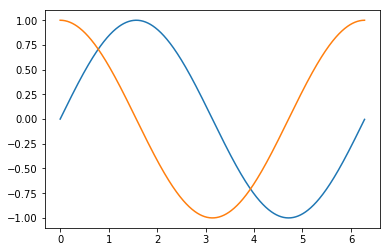

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
z = np.cos(x)
ax = plt.plot(x,np.matrix([y, z]).T)

## 7.- Interactive Visualization with `interact` IPython widget

The `interact` function (`ipywidgets.interact`) automatically creates a user interface (UI) controls for exploring code and data interactively. It is the __easiest way__ to get started using IPython’s widgets.

In [17]:
from ipywidgets import interact, IntSlider, FloatSlider

At the most basic level, `interact` autogenerates UI controls for function arguments, and then __calls the function__ with those arguments when you manipulate the controls interactively. To use `interact`
, you __need to define a function that you want to explore__. Here is a function that prints its only argument x.

In [10]:
def f(x):
    return x

* __Checkbox:__ If you pass True or False, interact will generate a checkbox:

In [12]:
interact(f, x=True);

* __Textbox:__  If you pass a string, `interact` will generate a text area box:

In [14]:
interact(f, x='hi there!');

* __IntSlider__: When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control with a range of [-10,+3*10].

In [18]:
interact(f, x=10);

In this case, 10 is an abbreviation for an actual slider widget:

In [19]:
IntSlider(min=-10,max=30,step=1,value=10)

In [20]:
interact(f, x=IntSlider(min=-10,max=30,step=1,value=10));

but you can also use this abbreviation in order to avoid instantiating `IntSlider` by yourself:

In [22]:
interact(f, x=(-50,50,2));

* __FloatSlider__: The same applies also for float arguments with the sliders:

In [25]:
interact(f, x=FloatSlider(min=-2., max=7., step=0.1, value=0.));

In [26]:
interact(f, x=(-2., 7., 0.1));

* __Dropdown:__ If you pass a list or a dictionary, then it will generate a dropdown widget:

In [27]:
interact(f, x=['orange', 'apple']);

In [29]:
interact(f, x={1:'orange', 2:'apple'});

### Fixing arguments using `fixed`

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [30]:
from ipywidgets import fixed

In [31]:
def h(p, q):
    return (p, q)

In [35]:
interact(h, p=5, q=1);

In [36]:
interact(h, p=5, q=fixed(10));

### Using `interact` for visualization

Now with all your knowledge of __`matplotlib`__ and __`interact`__ you have all what you need to perform __interactive visualization__!

In this section we will use this tools to perform interactive data visualization over a __3D spectroscopic data line cube__ of  __Orion Nebulae__. We first load the data:

In [37]:
data = np.load("orion.npy")
print('Shape:', data.shape)
print('Data type:', data.dtype)

Shape: (41, 100, 100)
Data type: >f4


The `axis0` is for frequency and the other two are for spatial coordinates. We want to see images of the slices in the frequency axis, in a interactive way.

For that we need to define the corresponding function to pass to `interact`:

In [38]:
def slice_show(data, i):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap='afmhot', vmin=0., vmax=1.)
    plt.grid()
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

In [39]:
interact(slice_show, data=fixed(data), i=(0,40));

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


__Let's improve the interactivity!__

In [40]:
def slice_show2(data, i, title='', show_colorbar=False, colormap='afmthot'):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=0., vmax=1.)
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [41]:
# full list of available colormaps:
# https://matplotlib.org/examples/color/colormaps_reference.html
colormap_list = ['afmhot','gray','plasma','inferno','copper','gist_heat','jet',]

interact(slice_show2, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


Finally we will use the _Scikit-image_ library to extend our interactive visualization, by adding image processing over each slice of the cube, applying different filters/kernels to the image:

In [42]:
def slice_show3(data, i, title='', show_colorbar=False, colormap='afmthot', img_filter=None):
    if img_filter is not None:
        _data = np.empty(data.shape)
        for j in range(data.shape[0]):
            _data[i,:,:] = img_filter(data[i,:,:])
        data = _data
        
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=data.min(), vmax=data.max())
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [44]:
from skimage import filters

# dictionary with the kernel to be used
filters = {'none':None, 'gaussian':filters.gaussian, 'hessian':filters.hessian, 'laplace':filters.laplace, \
           'sobel':filters.sobel, 'frangi':filters.frangi, 'median':filters.median, 'prewitt':filters.prewitt}

# full list of available filters:
# http://scikit-image.org/docs/dev/api/skimage.filters.html

In [45]:
interact(slice_show3, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list, img_filter=filters);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


## Additional Advanded Libraries

### Scikit-learn

<a href="http://scikit-learn.org">scikit-learn</a> provides algorithms for machine learning tasks, such as classification, regression, and clustering, as well as associated operations, such as cross-validation and feature normalization. These topics will be covered in greater depth in Guillermo Cabrera's talks <a href="">here</a>. A related module is <a href="http://www.astroml.org">astroML</a> which is a wrapper around a lot of the scikit-learn routines but also offers some additional functionality and faster/alternate implementations of some methods.

### Pandas
<a href="http://pandas.pydata.org/index.html">pandas</a> offers data structures, particularly data frames, and operations for manipulating numerical tables and time series, such as fancy indexing, reshaping and pivoting, and merging, as well as a number of analysis tools. Although similar functionality already exists in numpy, pandas is highly optimized for performance and large data sets.  Some of these topics will be covered in greater depth in Mauricio San Martin's talk <a href="placeholder">here</a>.